In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"D:\Data\ML\Linear regression\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
df['mainroad_bin'] = df['mainroad'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)
df['guestroom_bin'] = df['guestroom'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)
df['basement_bin'] = df['basement'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)
df['hotwaterheating_bin'] = df['hotwaterheating'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)
df['airconditioning_bin'] = df['airconditioning'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)
df['prefarea_bin'] = df['prefarea'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_bin,guestroom_bin,basement_bin,hotwaterheating_bin,airconditioning_bin,prefarea_bin
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1,0,0,0,1,1
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,0,0,0,1,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0,1,0,0,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,0,1,0,1,1
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1,0,1,0,0,0
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0,0,0,0,0,0
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1,0,0,0,0,0
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,0,0,0,0,0,0


In [17]:
furnish_dummies = pd.get_dummies(df['furnishingstatus'], prefix='bin', dtype=int)
df = pd.concat([df, furnish_dummies], axis=1)
df[['furnishingstatus', 'bin_furnished','bin_semi-furnished', 'bin_unfurnished']]

,furnishingstatus,bin_furnished,bin_semi-furnished,bin_unfurnished
0,furnished,1,0,0
1,furnished,1,0,0
2,semi-furnished,0,1,0
3,furnished,1,0,0
4,furnished,1,0,0
...,...,...,...,...
540,unfurnished,0,0,1
541,semi-furnished,0,1,0
542,unfurnished,0,0,1
543,furnished,1,0,0


In [18]:
df 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,furnishingstatus,mainroad_bin,guestroom_bin,basement_bin,hotwaterheating_bin,airconditioning_bin,prefarea_bin,bin_furnished,bin_semi-furnished,bin_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,...,furnished,1,0,0,0,1,1,1,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,...,furnished,1,0,0,0,1,0,1,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,...,semi-furnished,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,...,furnished,1,0,1,0,1,1,1,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,...,furnished,1,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,...,unfurnished,1,0,1,0,0,0,0,0,1
541,1767150,2400,3,1,1,no,no,no,no,no,...,semi-furnished,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,yes,no,no,no,no,...,unfurnished,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,no,no,no,no,no,...,furnished,0,0,0,0,0,0,1,0,0


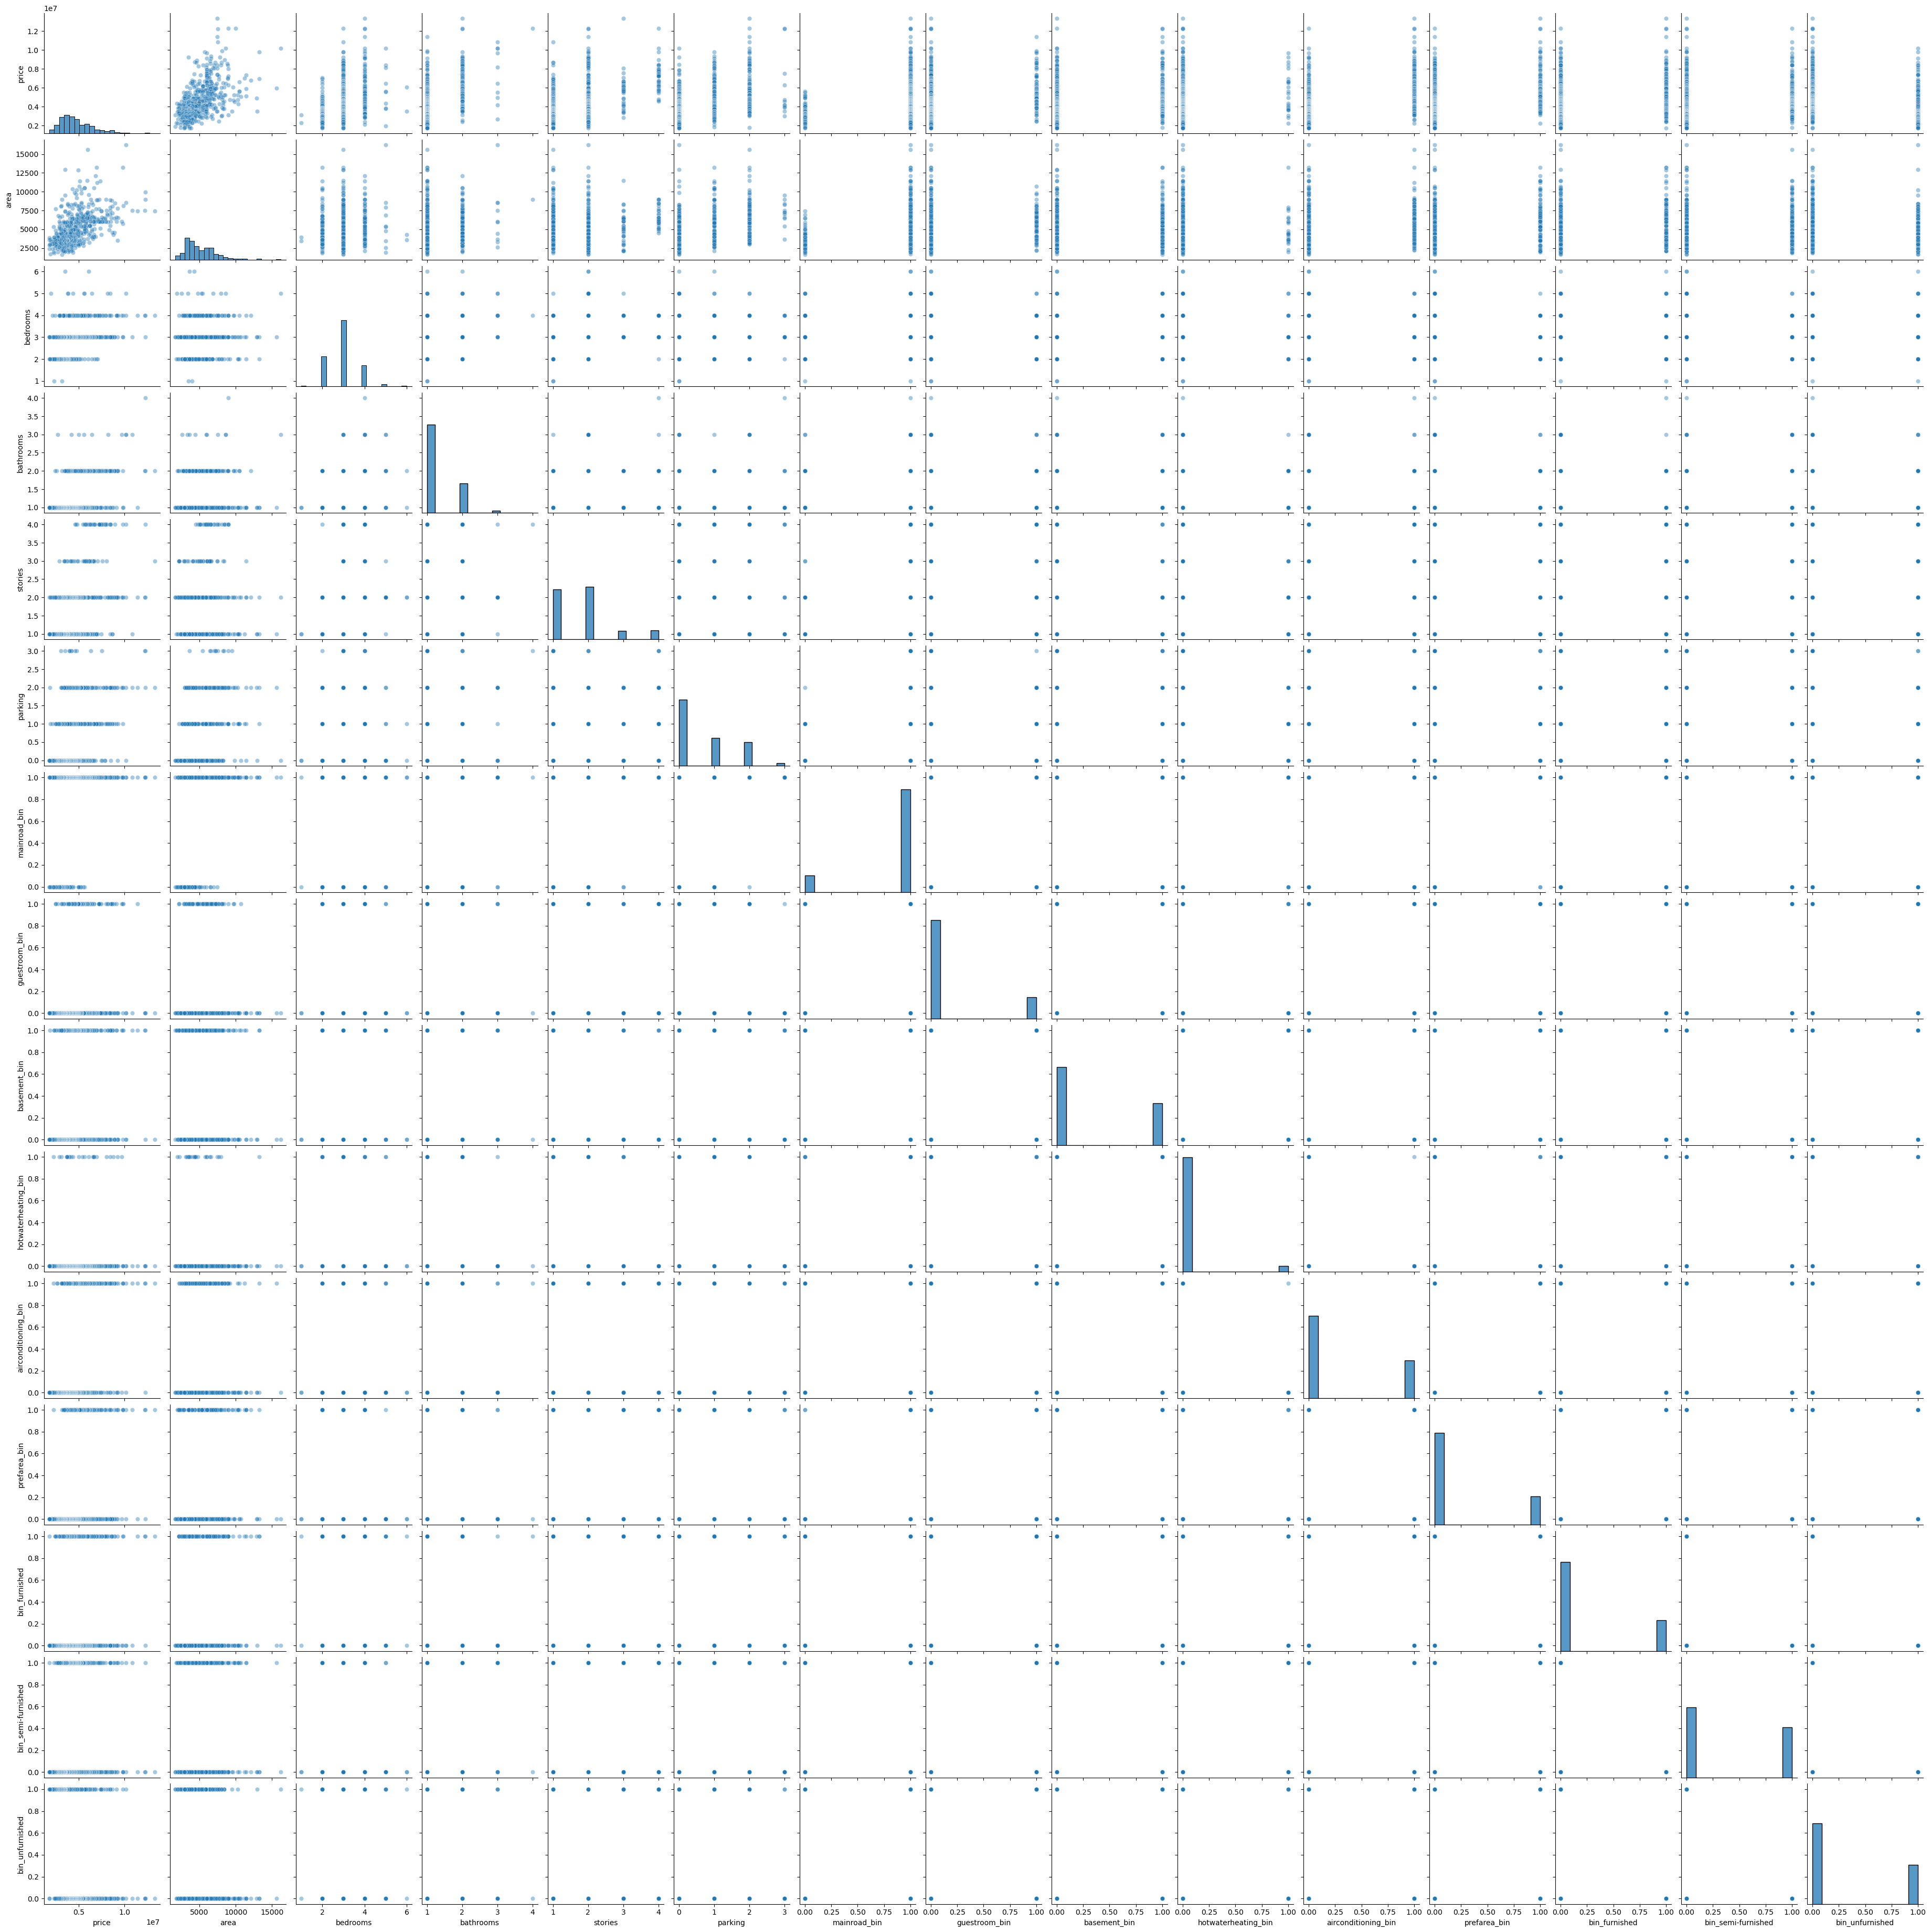

In [21]:
sns.pairplot(df, kind="scatter",plot_kws={'alpha':0.4})

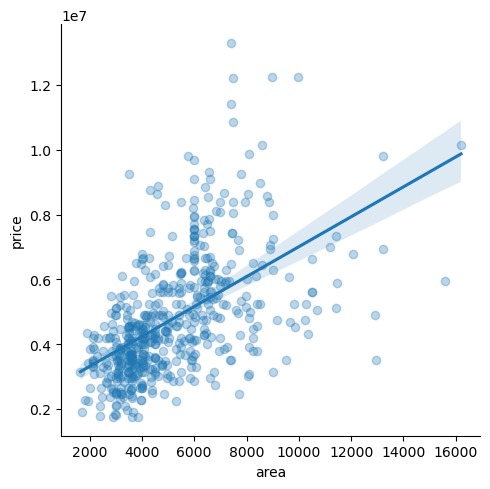

In [22]:
sns.lmplot(
    x = "area",
    y = "price",
    data = df,
    scatter_kws= {'alpha':0.3}
)

In [25]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,furnishingstatus,mainroad_bin,guestroom_bin,basement_bin,hotwaterheating_bin,airconditioning_bin,prefarea_bin,bin_furnished,bin_semi-furnished,bin_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,...,furnished,1,0,0,0,1,1,1,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,...,furnished,1,0,0,0,1,0,1,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,...,semi-furnished,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,...,furnished,1,0,1,0,1,1,1,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,...,furnished,1,1,1,0,1,0,1,0,0


In [23]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'mainroad_bin',
       'guestroom_bin', 'basement_bin', 'hotwaterheating_bin',
       'airconditioning_bin', 'prefarea_bin', 'bin_furnished',
       'bin_semi-furnished', 'bin_unfurnished'],
      dtype='object')

In [24]:
from sklearn.model_selection import train_test_split 

In [29]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories','parking','mainroad_bin','guestroom_bin', 'basement_bin', 'hotwaterheating_bin',
       'airconditioning_bin', 'prefarea_bin', 'bin_furnished',
       'bin_semi-furnished', 'bin_unfurnished']]
y = df['price']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
395    3500000
425    3360000
195    4970000
452    3150000
154    5530000
Name: price, Length: 164, dtype: int64

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()

In [34]:
lm.fit(X_train, y_train)

LinearRegression()

In [37]:
lm.coef_

array([ 2.53287252e+02,  8.08931413e+04,  1.11475118e+06,  4.17267580e+05,
        3.03111236e+05,  4.08073682e+05,  2.75710533e+05,  4.82603522e+05,
        6.16375423e+05,  6.85839346e+05,  5.09192089e+05,  1.70947968e+05,
        4.92953049e+04, -2.20243273e+05])

In [39]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
area,2.532873e+02
bedrooms,8.089314e+04
bathrooms,1.114751e+06
stories,4.172676e+05
parking,3.031112e+05
mainroad_bin,4.080737e+05
guestroom_bin,2.757105e+05
basement_bin,4.826035e+05
hotwaterheating_bin,6.163754e+05
airconditioning_bin,6.858393e+05


In [40]:
prediction = lm.predict(X_test)
prediction

array([5372312.61614641, 7069241.00525807, 3099290.78784024,
       4526446.61703975, 3281573.61192656, 3589455.18752547,
       5728625.30074516, 6422877.52476236, 2797870.4956859 ,
       2554357.99210551, 9693560.19894658, 2802903.7613103 ,
       3026465.95300836, 3433891.33202092, 3792786.34565513,
       5321204.36478554, 2999852.37322993, 4813306.52790376,
       4572077.61633939, 3595733.80237382, 5605701.03333099,
       5838934.41614981, 2730716.89440108, 4837741.37096246,
       5638460.49223857, 7809681.30410656, 3347443.37529207,
       5328750.6625753 , 8323072.8323739 , 3374792.28854334,
       6379706.15324898, 3397999.89564252, 6709115.8233402 ,
       4249666.18392567, 3594972.20315591, 5842994.13027721,
       5115480.11172668, 4359421.90319848, 3046570.15372423,
       4597379.56416964, 4784358.1758961 , 3411743.78220679,
       7048978.02507302, 4062741.36892573, 3785699.24160861,
       4286017.77250844, 6729020.20739641, 4133428.23821411,
       3845434.09183083,

Text(0.5, 1.0, 'Prediction vs actual data')

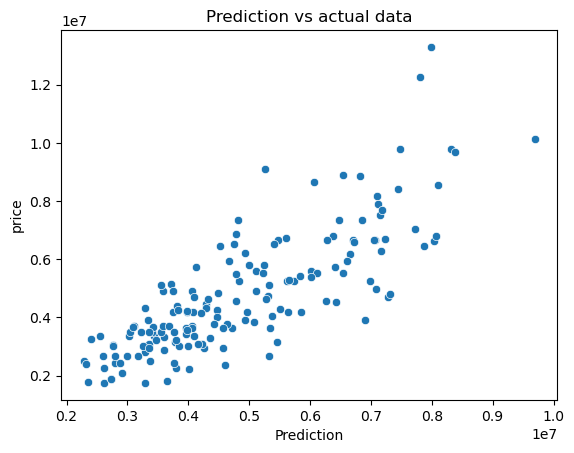

In [42]:
sns.scatterplot(x=prediction, y=y_test)
plt.xlabel("Prediction")
plt.title("Prediction vs actual data")

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [47]:
print("Mean absolute error: ", mean_absolute_error(y_test, prediction))
print("Mean squared error: ", mean_squared_error(y_test, prediction))
print("Root Mean absolute error: ", math.sqrt(mean_squared_error(y_test, prediction)))

Mean absolute error:  920392.9397607954
Mean squared error:  1523019469501.2903
Root Mean absolute error:  1234106.7496376843


In [45]:
residuals = y_test - prediction


<function matplotlib.pyplot.show(close=None, block=None)>

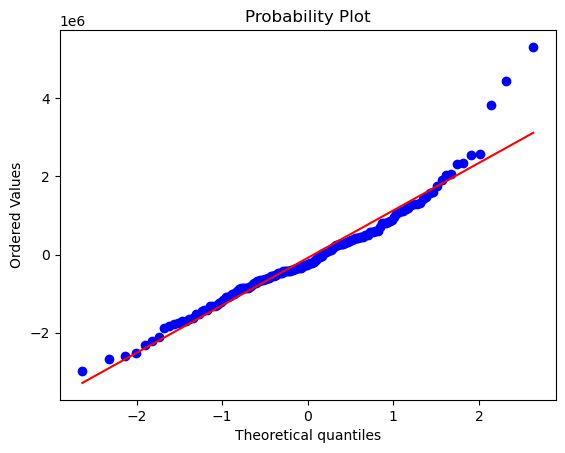

In [50]:
import pylab
from scipy import stats

stats.probplot(residuals, dist='norm', plot=pylab)
pylab.show

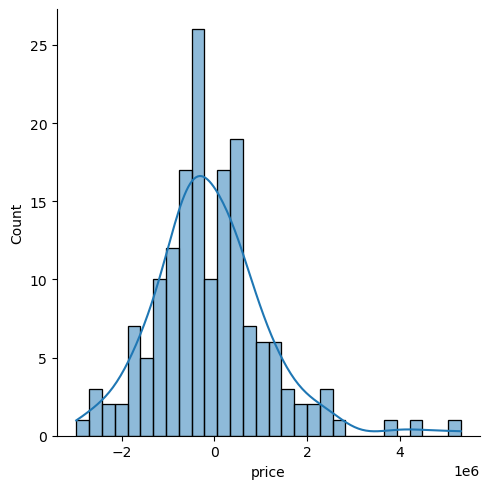

In [51]:
sns.displot(residuals, bins = 30, kde = True)

In [49]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_bin,guestroom_bin,basement_bin,hotwaterheating_bin,airconditioning_bin,prefarea_bin,bin_furnished,bin_semi-furnished,bin_unfurnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,0.858716,0.177982,0.350459,0.045872,0.315596,0.234862,0.256881,0.416514,0.326606
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,0.348635,0.382849,0.477552,0.209399,0.465180,0.424302,0.437314,0.493434,0.469402
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
print (residuals)

316   -1.312313e+06
77    -4.192410e+05
360    6.107092e+05
90     1.913553e+06
493   -4.815736e+05
           ...     
395   -2.622572e+05
425   -7.332088e+05
195   -2.120389e+06
452   -2.309979e+06
154    3.103569e+05
Name: price, Length: 164, dtype: float64


In [55]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, prediction)
r2

0.6463350878895879